***Importing Dependencies*** 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

***Data Collection and Analysis***

In [2]:
diabetes_dataset = pd.read_csv('/content/diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [6]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

***Heat Map Generation and Finding out the Corelation between independent variables***

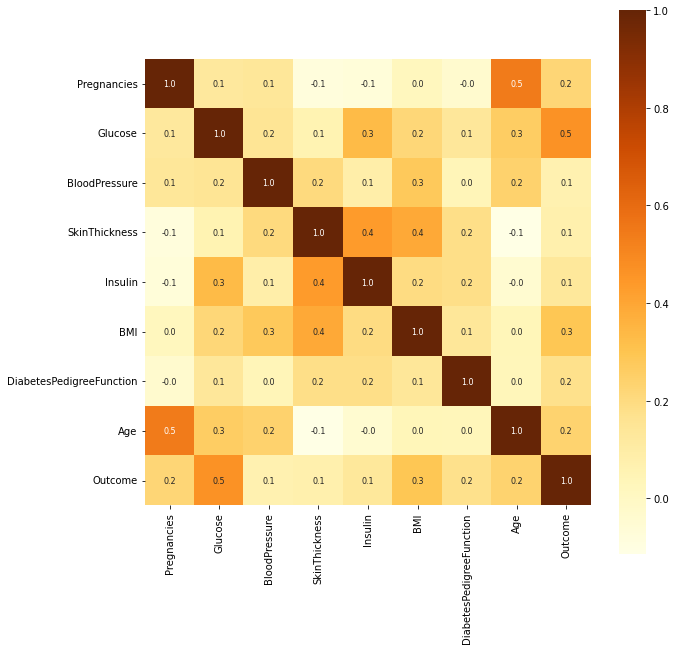

In [7]:
correlation = diabetes_dataset.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='YlOrBr')

In [8]:
X=diabetes_dataset.drop(columns='Outcome',axis = 1)
Y=diabetes_dataset['Outcome']

In [9]:
print(X)
print(Y)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

In [10]:
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


***Data Standardization***

In [11]:
#scaler=StandardScaler()
#scaler.fit(X)
#standardized_data=scaler.transform(X)
#print(standardized_data)
#X=standardized_data
#Y=diabetes_dataset['Outcome']
#print(X)
#print(Y)

***Model Creation for different algorithms***


In [12]:
LogisticRegressionModel=LogisticRegression(solver="liblinear" , max_iter=100)
#DecisionTreeClassifierModel=DecisionTreeClassifier()
#ClassifierModel=svm.SVC(kernel='linear')


***Splitting the Data***

***0.025 --> 1.0 Accuracy
   0.035 --> 0.96 Accuracy***

In [13]:
X_train,x_test,Y_train,y_test=train_test_split(X,Y,test_size=0.035,random_state=0)
print(X.shape,X_train.shape,x_test.shape)
print(Y)

#K-Fold Cross Validation
#from sklearn.model_selection import KFold
#kfold_validation1=KFold(30)
#10 different splits with different random states
#from sklearn.model_selection import cross_val_score
#results1=cross_val_score(ClassifierModel,X,Y,cv=kfold_validation)
#results2=cross_val_score(LogisticRegressionModel,X,Y,cv=kfold_validation)
#results3=cross_val_score(DecisionTreeClassifierModel,X,Y,cv=kfold_validation)
#print('SVM = ',results1)
#print('Logistic Regression',results2)
#print('Decision Tree Classifier',results3)
#print(np.mean(results1))
#print(np.mean(results2))
#print(np.mean(results3))


(768, 8) (741, 8) (27, 8)
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


**Using the above cell we find out that the Logistic Regression Model is more accurate when compared with SVM and Decision Tree Classifier. 
Later down the line we will further use Hyper Parameter Tuning to further increase the accuracy**

***Training the Model***

In [14]:
LogisticRegressionModel.fit(X_train,Y_train)

LogisticRegression(solver='liblinear')

***Evaluation the Model***

In [15]:
#Prediction on training data
predict1=LogisticRegressionModel.predict(X_train)
training_data_accuracy_score=accuracy_score(predict1,Y_train)
print(training_data_accuracy_score)

0.7705802968960864


In [16]:
#Prediction on test data
predict2=LogisticRegressionModel.predict(x_test)
test_data_accuracy_score=accuracy_score(predict2,y_test)
print(test_data_accuracy_score)

0.9629629629629629


***Making a Predictive System***

In [17]:
#OLD WITHOUT HYPER PARAMETERS
input_data=(6,148,72,35,0,33.6,0.627,50)
input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
#print(input_data_reshaped)
predict=LogisticRegressionModel.predict(input_data_reshaped)
#print(predict)
if(predict[0]==0):
  print("Patient is Not Diabetic")
else:
  print("Patient is Diabetic")

Patient is Diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"


***Hyperparameter Tuning***


Code Snippet below written by Author Enes Polat https://www.kaggle.com/enespolat


In [18]:
grid=[{"C":np.logspace(-10,10,20), "penalty":["l1","l2"]}]# l1 lasso l2 ridge
logreg_cv=GridSearchCV(LogisticRegressionModel,grid,cv=10)
logreg_cv.fit(x_test,y_test)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, inc

tuned hpyerparameters :(best parameters)  {'C': 78475997.03514622, 'penalty': 'l1'}
accuracy : 1.0


**Applying Parameters to the Model**


In [19]:
update=LogisticRegression(solver = "liblinear", penalty = "l2", C=4.799818286283774)
update.fit(X_train,Y_train)
train_pred=update.predict(X_train)
test_pred=update.predict(x_test)
score=accuracy_score(test_pred,y_test)
print(score)

0.9629629629629629


**Newer Prediction Model**

In [20]:
input_data=(1,103,30,38,83,43.3,0.183,33)
input_data_numpy=np.asarray(input_data)
input_data_reshaped=input_data_numpy.reshape(1,-1)
#print(input_data_reshaped)
predict1=update.predict(input_data_reshaped)
#print(predict)
if(predict1[0]==0):
  print("Patient is Not Diabetic")
else:
  print("Patient is Diabetic")

Patient is Not Diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
